In [3]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
df = pd.read_csv('TD.TO.csv')
df.head()


,open,high,volume,low,close,date,adjclose
0,67.510002,68.430000,3930300,67.120003,68.250000,2019-01-02,66.269646
1,68.110001,68.110001,5407700,67.120003,67.300003,2019-01-03,65.347214
2,68.000000,68.150002,5103400,67.669998,67.980003,2019-01-04,66.007484
3,68.589996,68.589996,5907000,67.449997,67.690002,2019-01-07,65.725899
4,68.000000,68.190002,7337200,67.330002,67.820000,2019-01-08,65.852127


In [5]:
def get_data(df):
    data = df.copy()
    data.date = data.date.str.split('-').str[2]
    data.date = pd.to_numeric(data.date)
    return [data.date.tolist(), data.close.tolist()]


In [6]:
dates, prices = get_data(df)
print(dates, prices)


[2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 28, 29, 30] [68.25, 67.30000305175781, 67.98000335693361, 67.69000244140625, 67.81999969482422, 68.13999938964844, 68.80000305175781, 68.86000061035156, 68.65000152587889, 69.33000183105469, 70.62999725341797, 71.33999633789062, 72.33999633789062, 72.9000015258789, 72.41000366210938, 72.19999694824219, 72.66000366210938, 72.83000183105469, 73.16999816894531, 73.70999908447266, 73.7300033569336]


## 使用不同核函数训练SVR，比较它们的性能


In [9]:
def predict_prices(dates, prices):
    dates = np.reshape(dates, (len(dates), 1))

    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)

    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

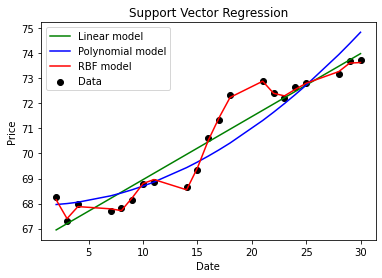

In [10]:
predict_prices(dates, prices)
